# Case Study: Video Game Sales - Akshay Hari - CB.EN.P2AID20009

### Original Dataset Link: [Kaggle](https://www.kaggle.com/ashaheedq/video-games-sales-2019)

Video Game Industry is one of the largest industry in the world. Video Game Industry is a big moneymaker when compared with Hollywood and North American sports industry combined. [reference](https://www.marketwatch.com/story/videogames-are-a-bigger-industry-than-sports-and-movies-combined-thanks-to-the-pandemic-11608654990)

In this case study, we are doing about the analysis of video games sales, Genres, platforms etc.

**Note: Plotly is required**

## Data Cleaning

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pip install plotly==4.14.1

In [281]:
#df = pd.read_csv("C:\\JupyterRoot\\Datasets\\vgsales-12-4-2019.csv")
df = pd.read_csv ("https://github.com/akshayhari/video-game-sales/raw/master/vgsales-12-4-2019.csv")
df.head(5)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

Data Cleaning
- Selecting only columns needed for our use

In [283]:
df1 = df.loc[:,["Name","Genre","Platform","Publisher","Developer","Total_Shipped","Global_Sales","NA_Sales","PAL_Sales","JP_Sales","Other_Sales","Year"]]
df1.tail(5)

,Name,Genre,Platform,Publisher,Developer,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
55787,Indivisible,Role-Playing,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,Lost Ember,Adventure,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55791,Falcon Age,Action-Adventure,PS4,Unknown,Outerloop Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Information about dataset

All the numerical sales data values are number of units sold in millions.

Information about Regional Sales data
- NA_Sales: North America
- JP_Sales: Japan
- PAL_Sales: India, China, European Countries (except France), Australia etc. (PAL countries)
- Other Sales: All other countries not included above

We can see that most of the sales data cells are empty and either Total_Shipped and Global_Sales are present in the dataset. So we need to combine them into a new column i.e. Total_Sales

### Creating Total Sales Data  based on following condition
- 'Global_Sales' should be equal to sum of all region sales i.e. NA_Sales + PAL_Sales + JP_Sales + Other_Sales
- Either 'Total_Shipped' or 'Global_Sales' needs to be present
- Creating Total Sales = Global Sales or Total Shipped or sum of all region sales

In [284]:
df2 = df1.loc[:,:]
df2.shape

(55792, 12)

Modifying data based on above mentioned condition

In [285]:
for i in range(len(df2)):
    if not pd.isna(df2.loc[i,'Global_Sales']):
        df2.loc[i,'Total_Sales']  = df2.loc[i,'Global_Sales']
    elif not pd.isna(df2.loc[i,'Total_Shipped']):
        df2.loc[i,'Total_Sales']  = df2.loc[i,'Total_Shipped']
    else:
        df2.loc[i,'Total_Sales']  = df2.loc[i,'NA_Sales'] + df2.loc[i,'PAL_Sales'] + df2.loc[i,'JP_Sales'] + df2.loc[i,'Other_Sales']

In [286]:
df2.head()

,Name,Genre,Platform,Publisher,Developer,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales
0,Wii Sports,Sports,Wii,Nintendo,Nintendo EAD,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,82.86
1,Super Mario Bros.,Platform,NES,Nintendo,Nintendo EAD,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,40.24
2,Mario Kart Wii,Racing,Wii,Nintendo,Nintendo EAD,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,37.14
3,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,36.60
4,Wii Sports Resort,Sports,Wii,Nintendo,Nintendo EAD,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,33.09


In [287]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           55792 non-null  object 
 1   Genre          55792 non-null  object 
 2   Platform       55792 non-null  object 
 3   Publisher      55792 non-null  object 
 4   Developer      55775 non-null  object 
 5   Total_Shipped  1827 non-null   float64
 6   Global_Sales   19415 non-null  float64
 7   NA_Sales       12964 non-null  float64
 8   PAL_Sales      13189 non-null  float64
 9   JP_Sales       7043 non-null   float64
 10  Other_Sales    15522 non-null  float64
 11  Year           54813 non-null  float64
 12  Total_Sales    21242 non-null  float64
dtypes: float64(8), object(5)
memory usage: 5.5+ MB


### Checking for null values
- Name and Platform cannot be null since they are the candidate key
- Also removing rows with year as null since they are also small in number
- Rest of the null values are leaving as it is. These maybe useful for later

In [288]:
df2.isnull().sum()

Name                 0
Genre                0
Platform             0
Publisher            0
Developer           17
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
Total_Sales      34550
dtype: int64

Dropping null values and resetting index

In [289]:
#df2 = df2[df2['Year'].notna()]
df2.dropna(subset=['Year'],inplace=True)
df2 = df2.reset_index(drop=True)

In [290]:
df2.isnull().sum()

Name                 0
Genre                0
Platform             0
Publisher            0
Developer           14
Total_Shipped    52986
Global_Sales     35436
NA_Sales         41855
PAL_Sales        41648
JP_Sales         47778
Other_Sales      39317
Year                 0
Total_Sales      33609
dtype: int64

In [291]:
#coerce will convert error values to NaN
df2['Year'] = pd.to_numeric(df2['Year'], downcast='integer', errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54813 entries, 0 to 54812
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           54813 non-null  object 
 1   Genre          54813 non-null  object 
 2   Platform       54813 non-null  object 
 3   Publisher      54813 non-null  object 
 4   Developer      54799 non-null  object 
 5   Total_Shipped  1827 non-null   float64
 6   Global_Sales   19377 non-null  float64
 7   NA_Sales       12958 non-null  float64
 8   PAL_Sales      13165 non-null  float64
 9   JP_Sales       7035 non-null   float64
 10  Other_Sales    15496 non-null  float64
 11  Year           54813 non-null  int16  
 12  Total_Sales    21204 non-null  float64
dtypes: float64(7), int16(1), object(5)
memory usage: 5.1+ MB


Deleting data in 2019 since the data seems to be scrubbed in 12-4-2019 and does not contain games released in rest of the year.

In [292]:
df2 = df2[df2['Year'] < 2019]
df2 = df2.reset_index(drop=True)

## Visualization

## Correlation matrix of all features

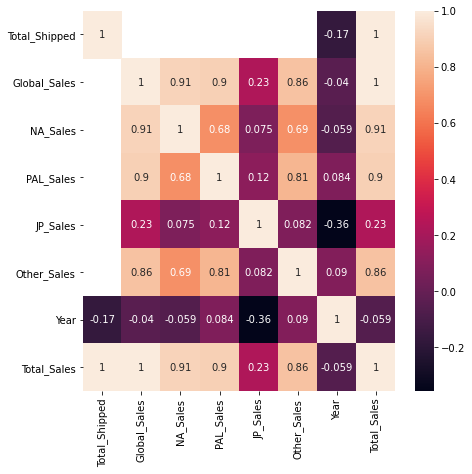

In [293]:
#plot heat map
import seaborn as sns
corrmat=df2.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(7,7))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True)

Anomaly in Total_Shipped vs other sales is because either one of them is present in the table

## Top 5 selling game of all time across all platforms

In [294]:
top_games = df2[['Name','Total_Sales']]
top_games1 = top_games.groupby("Name",as_index=False).sum()
top_games1 = top_games1.sort_values(by=['Total_Sales'],ascending=False)
top_5 = top_games1.head()
import plotly.express as px
fig = px.bar(top_5, x="Name", y="Total_Sales", color="Total_Sales", title="Top 5 games sold (millions of units sold)")
fig.show()

## Number of Games in each Genre

In [295]:
asd = pd.DataFrame(df2['Genre'].value_counts())
import plotly.express as px
fig = px.pie(asd, values='Genre', names=asd.index, title='Number of Games in each Genre')
fig.show()

In [296]:
years = df2['Year'].unique()
print(years)

[2006 1985 2008 2017 2009 1998 1989 2010 2007 2005 2000 1991 2013 2014
 2004 2011 1990 2003 2002 2016 2015 2001 1999 2018 2012 1996 1992 1993
 1997 1994 1982 1988 1987 1995 1981 1986 1978 1983 1984 1977 1980 1970
 1979 1975 1973]


## Number of Games available in each platform

<AxesSubplot:>

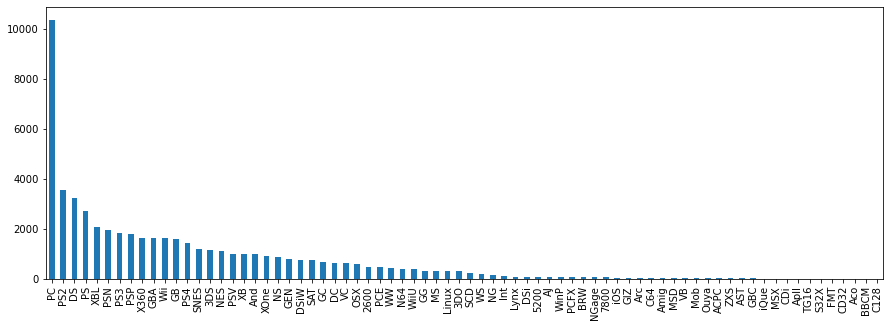

In [297]:
df2['Platform'].value_counts().plot(kind='bar',figsize=(15,5))

Creating dataframe where all the regional sales information are available.

In [298]:
data = df2.dropna(subset=['Global_Sales','NA_Sales','PAL_Sales','JP_Sales','Other_Sales','Year'])
data = data.drop(columns=['Total_Shipped','Total_Sales'])
data.head()

,Name,Genre,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
19,Grand Theft Auto V,Action,PS3,Rockstar Games,Rockstar North,20.32,6.37,9.85,0.99,3.12,2013
20,Grand Theft Auto V,Action,PS4,Rockstar Games,Rockstar North,19.39,6.06,9.71,0.60,3.02,2014
30,Grand Theft Auto: Vice City,Action,PS2,Rockstar Games,Rockstar North,16.15,8.41,5.49,0.47,1.78,2002
32,Grand Theft Auto V,Action,X360,Rockstar Games,Rockstar North,15.86,9.06,5.33,0.06,1.42,2013
34,Call of Duty: Black Ops 3,Shooter,PS4,Activision,Treyarch,15.09,6.18,6.05,0.41,2.44,2015


## Hypothesis Testing

Playstation 3 and XBox 360 are two of the consoles which are in same generation. As per reports Playstation 3 has more number of units sold when compared with XBox 360 (87.4  million  units vs 84  million units). However in 2015, both Microsoft and Sony stopped disclosing the sales figure. So by now,their sales figure might be almost equal. Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles), [EscapistMagazine](https://www.escapistmagazine.com/v2/who-finally-won-ps3-or-xbox-360/). 

Since the number of units of each unit might be comparable now, let's hypothesis that, for a game, which is available in both platforms,  PS3 will have same game sales when compared with X360.

- **Null Hypothesis**: A game which is available in both platforms, PS3 and X360 will have comparable sales.
- **Alternate Hypothesis**: Sales would not be equal and will be independent.

Filtering all the games which are in both PS3 and X360

In [299]:
xy = data.loc[data['Platform'].isin(["PS3", "X360"])]
xy = xy.groupby("Name").filter(lambda x: len(x) == 2)
xy = xy[['Name','Platform','Global_Sales']]
xy

,Name,Platform,Global_Sales
19,Grand Theft Auto V,PS3,20.32
32,Grand Theft Auto V,X360,15.86
40,Call of Duty: Modern Warfare 3,X360,14.82
41,Call of Duty: Black Ops,X360,14.74
46,Call of Duty: Black Ops II,X360,13.86
...,...,...,...
12188,Blades of Time,X360,0.10
12440,Blades of Time,PS3,0.10
12496,NeverDead,X360,0.10
12853,Quantum Theory,X360,0.09


Extracting games in PS3

In [300]:
ps3 = xy.loc[xy['Platform'] == "PS3"]
ps3 = ps3.sort_values(by=['Name'])
ps3 = ps3.reset_index(drop=True)
ps3.tail()

,Name,Platform,Global_Sales
250,Watch Dogs,PS3,1.83
251,Way of the Samurai 3,PS3,0.52
252,Wet,PS3,0.62
253,X-Blades,PS3,0.14
254,Zone of the Enders HD Collection,PS3,0.39


Extracting Games in X360

In [301]:
x360 = xy.loc[xy['Platform'] == "X360"]
x360 = x360.sort_values(by=['Name'])
x360 = x360.reset_index(drop=True)
x360.tail()

,Name,Platform,Global_Sales
250,Watch Dogs,X360,1.29
251,Way of the Samurai 3,X360,0.21
252,Wet,X360,0.50
253,X-Blades,X360,0.14
254,Zone of the Enders HD Collection,X360,0.21


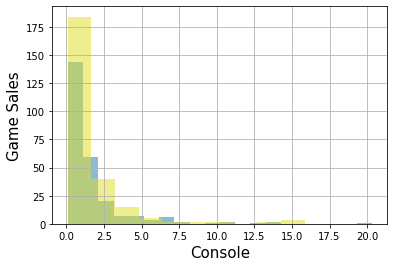

In [302]:
import seaborn as sns
ps3['Global_Sales'].hist(histtype='stepfilled', alpha=.5, bins=20)  
x360['Global_Sales'].hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("yellow", .75), bins=10)
plt.xlabel('Console',fontsize=15)
plt.ylabel('Game Sales',fontsize=15)
plt.show()

The distributions seems to be almost equal and XBox 360 seems to have higher sales.

In [303]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<AxesSubplot:title={'center':'PS3'}>,
       <AxesSubplot:title={'center':'X360'}>], dtype=object)

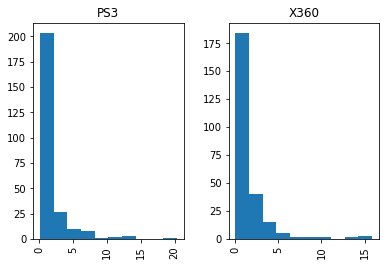

In [304]:
xy.hist(by ='Platform')

In [305]:
console  = ['PS3','X360']
means_c = [ps3[['Global_Sales']].mean().values[0],x360[['Global_Sales']].mean().values[0]]
means_dict = {'Console':console, 'Original Mean':means_c}
means_df =  pd.DataFrame(means_dict) 
means_df

,Console,Original Mean
0,PS3,1.744902
1,X360,1.679373


To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

In [306]:
observed_difference = ps3[['Global_Sales']].mean().values[0] - x360[['Global_Sales']].mean().values[0]
print(observed_difference)

0.06552941176470495


In [307]:
shuffled = xy['Global_Sales'].sample(510,replace = False)
shuffled

418      3.64
7825     0.24
2936     0.81
1658     1.37
5539     0.40
         ... 
1084     1.90
11699    0.11
953      2.08
2878     0.83
1257     1.69
Name: Global_Sales, Length: 510, dtype: float64

In [308]:
original_and_shuffled= xy.assign(Shuffled_sales=shuffled.values)
original_and_shuffled

,Name,Platform,Global_Sales,Shuffled_sales
19,Grand Theft Auto V,PS3,20.32,3.64
32,Grand Theft Auto V,X360,15.86,0.24
40,Call of Duty: Modern Warfare 3,X360,14.82,0.81
41,Call of Duty: Black Ops,X360,14.74,1.37
46,Call of Duty: Black Ops II,X360,13.86,0.40
...,...,...,...,...
12188,Blades of Time,X360,0.10,1.90
12440,Blades of Time,PS3,0.10,0.11
12496,NeverDead,X360,0.10,2.08
12853,Quantum Theory,X360,0.09,0.83


In [309]:
all_group_means= original_and_shuffled.groupby('Platform',as_index=False).mean()
all_group_means

,Platform,Global_Sales,Shuffled_sales
0,PS3,1.744902,1.941882
1,X360,1.679373,1.482392


In [310]:
difference = all_group_means['Shuffled_sales'][0]- all_group_means['Shuffled_sales'][1]
difference

0.45949019607843256

In [311]:
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    consoles = xy[['Platform', 'Global_Sales']]
    shuffled = consoles.sample(510,replace = False)
    Shuffled_sales = shuffled['Global_Sales']
    original_and_shuffled = consoles.assign(Shuffled_sales=Shuffled_sales.values)
    all_group_means= original_and_shuffled.groupby('Platform').mean()
    difference = all_group_means['Shuffled_sales'][0]- all_group_means['Shuffled_sales'][1]
    differences[i] = difference
original_and_shuffled

,Platform,Global_Sales,Shuffled_sales
19,PS3,20.32,0.33
32,X360,15.86,0.85
40,X360,14.82,0.25
41,X360,14.74,0.83
46,X360,13.86,1.34
...,...,...,...
12188,X360,0.10,1.43
12440,PS3,0.10,0.30
12496,X360,0.10,1.70
12853,X360,0.09,0.19


In [312]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.405451
1,-0.139961
2,-0.007647
3,-0.373216
4,-0.306706
...,...
4995,0.012431
4996,-0.334000
4997,-0.388353
4998,0.084510


Observed Difference: 0.06552941176470495


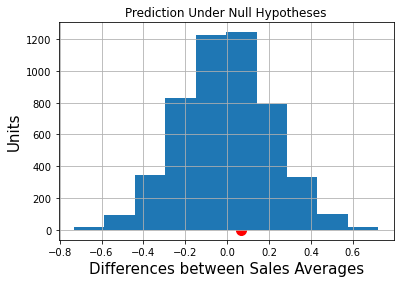

In [313]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Sales Averages',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.scatter(observed_difference, -1, color='red', s=100)
print('Observed Difference:', observed_difference)

In [314]:
empirical_P = np.count_nonzero(differences <= observed_difference)/5000
empirical_P

0.63

The observed difference lies close to the centre of the distribution.The p-value we got is 0.63 which is greater than 0.05. Therefore we fail to reject the null-hypothesis.

Based on this results, we can conclude that PS3 and X360 may have comparable sales for game which is available in both platform.

In [315]:
#############################

# Regression: PAL-Sales vs Other Sales

Most of the video game sales are in North American Region and Japan. Only the popular games perform well in other areas. In the correalation matrix below, we can see that there is a relation between sales in PAL region and Other regions. Therefore using regression models, we might be able to predict sales of a game in these regions.

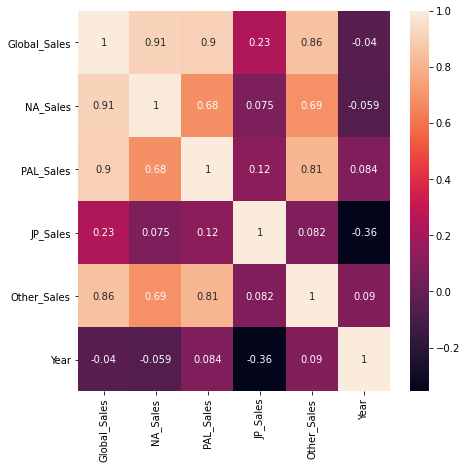

In [316]:
#plot heat map
import seaborn as sns
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(7,7))
g=sns.heatmap(df2[top_corr_features].corr(),annot=True)

Splitting columns for training and testing

In [317]:
X = data.PAL_Sales
x = np.array(X).reshape(-1,1)
y = data.Other_Sales
y = np.array(y).reshape(-1,1)
print("X:",x.shape)
print("Y:",y.shape)

X: (2415, 1)
Y: (2415, 1)


In [318]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=8)
print("x Train:",x_train.shape)
print("x Test:",x_test.shape)
print("y Train:",y_train.shape)
print("y Test:",y_test.shape)

x Train: (1690, 1)
x Test: (725, 1)
y Train: (1690, 1)
y Test: (725, 1)


### Linear Regression Model

In [319]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test,pred)*100,"%")

R2 score: 70.88008886065873 %


#### Linear Regression with 10-fold cross validation

In [320]:
from sklearn import model_selection
from sklearn.model_selection import KFold
lr_kfold = LinearRegression()
kfold = model_selection.KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(lr_kfold, x_train, y_train, cv=kfold)
print("10-fold cv",results_kfold*100)
print("--------------------------------------------------------------------")
print("10-fold accuracy mean:",results_kfold.mean()*100,"%") 

10-fold cv [57.8338381  64.04632035 95.54291653 56.97144251 88.16591737 82.94010644
 80.86178767 76.04361597 66.15213527 34.2840559 ]
--------------------------------------------------------------------
10-fold accuracy mean: 70.2842136107418 %


Text(0, 0.5, 'Other Region Sales')

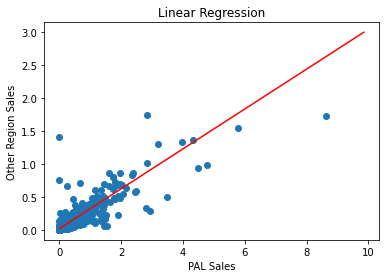

In [321]:
plt.scatter(x=x_test,y=y_test)
plt.plot(x,lr.predict(x), color='red')
plt.title('Linear Regression')
plt.xlabel("PAL Sales")
plt.ylabel("Other Region Sales")

In [322]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)
print("Root MSE of training set:",mean_squared_error(y_train, y_train_predict, squared=False))
print("Root MSE of testing set:",mean_squared_error(y_test, y_test_predict, squared=False))
print("MSE of training set:",mean_squared_error(y_train, y_train_predict))
print("MSE of testing set:",mean_squared_error(y_test, y_test_predict))

Root MSE of training set: 0.15692029114409942
Root MSE of testing set: 0.1139375123315592
MSE of training set: 0.02462397777274893
MSE of testing set: 0.012981756716304206


In [323]:
import statsmodels.api as sm
z1 = sm.OLS(x_train,y_train)
z2 = z1.fit()
z2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              5618.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:27:17   Log-Likelihood:                         -1022.9
No. Observations:                1690   AIC:                                      2048.
Df Residuals:                    1689   BIC:                                      2053.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4601      0.033     74.951      0.000       2.396       2.525
==============================================================================
Omnibus:                     1837.232   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529574.569
Skew:                          -4.822   Prob(JB):                         0.00
Kurtosis:                      89.183   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Polynomial Regression with Degree 2

In [324]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
pol_reg=LinearRegression()
l=pol_reg.fit(x_poly,y_train)
prediction = pol_reg.predict(poly.fit_transform(x_test))
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test,prediction)*100,"%")

R2 score: 70.87053598608142 %


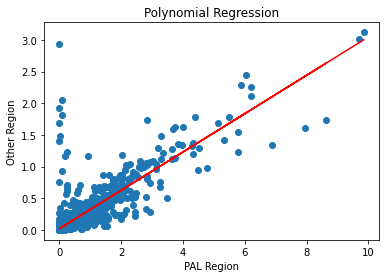

In [325]:
plt.scatter(x, y) 
plt.plot(x, l.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel("PAL Region")
plt.ylabel("Other Region")
plt.show()

In [326]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=10, shuffle=False)
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x_train)
model = pol_reg.fit(x_poly, y_train)
scores = cross_val_score(model, x_poly, y_train, scoring="r2", cv=crossvalidation,n_jobs=1)
print(np.array(scores))
final_score = np.array(scores).mean()
print("R2 score:",final_score)

[0.57832997 0.63746673 0.95397214 0.56824258 0.88083259 0.82939247
 0.80844414 0.7604404  0.65097563 0.3424596 ]
R2 score: 0.701055623801328


Therefore based on the scores, for the problem, both regression models are equally good. However the difference in the k-fold scores is due to the presence of outliers.

Therefore based on the above models, we can predict the sales.

# Student T-Test

**2K Games** is an American video game publisher. Although video games published in Japan are mostly popular in North America, the vice versa may not be true. Therefore let's check the dependency of Game sales in Japan and North America.

In [327]:
ttest = data.loc[(data['Publisher'] == "2K Games")]
ttest = ttest[['Name','NA_Sales', 'JP_Sales']]
ttest.shape

(24, 3)

In [328]:
ttest.head()

,Name,NA_Sales,JP_Sales
459,Borderlands,2.43,0.03
547,Borderlands 2,1.89,0.04
604,Mafia III,0.72,0.04
621,BioShock,1.65,0.05
853,Borderlands 2,1.06,0.10


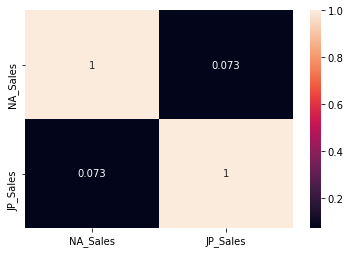

In [329]:
import seaborn as sns
corrmat=ttest[['NA_Sales','JP_Sales']].corr()
top_corr_features=corrmat.index
plt.figure()
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In the correlation matrix also, we can see that the columns does not have much dependency. Let's confirm this by checking whether the sales of Games published by 2K Games are dependent in North America and Japan.

- **Null Hypothesis**: Sales of same games by 2K Games are dependent.
- **Alternate Hypothesis**: Sales are independent

**Since the total number of Games are only 24, we can do an independent Student's T-test.**

In [330]:
na = ttest[['NA_Sales']]
jp = ttest[['JP_Sales']]
print("NA mean:",na.mean().values[0])
print("JP mean:",jp.mean().values[0])

NA mean: 0.7579166666666667
JP mean: 0.02958333333333334


**Degree of Freedom** = 24 + 24 - 2 = 46

In [331]:
import scipy.stats as stats
x,p_value=stats.ttest_ind(na,jp)
if p_value[0] < 0.05:
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are rejecting null hypothesis


Based on T-test, we are rejecting the null hypothesis. Therefore we can conclude that games published by 2k Games have independent sales in North America and Japan.

# Classification: Classifying whether game belongs to Sports Genre or not.

Some of the  video game genres are highly popular(eg: Action, Sports etc). Therefore based on given sales data, we are classifying whether given game belongs to Sports or Other Less popular category. We are taking a subset of dataset. Therefore the categories included are Sports, Music, Visual Novel, Party.

In [332]:
df_c = data.loc[:,:]
df_c = df_c.loc[df_c['Genre'].isin(["Sports", "Music", "Visual Novel", "Party"])]

In [333]:
df_c = df_c.drop(columns=['Name','Platform','Publisher','Developer'])
df_c = df_c.reset_index(drop=True)
df_c.tail()

,Genre,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
259,Sports,0.08,0.07,0.00,0.00,0.01,2008
260,Visual Novel,0.07,0.03,0.00,0.02,0.01,2015
261,Visual Novel,0.06,0.01,0.02,0.02,0.01,2015
262,Sports,0.05,0.01,0.00,0.03,0.00,2002
263,Sports,0.05,0.01,0.01,0.01,0.01,2007


Manually encoding Genres. 
- 0 for sports 
- 1: for other genres

In [334]:
for i in range(len(df_c)):
    if df_c.loc[i,"Genre"]  == "Sports":
        df_c.loc[i,"Genre"]  = 0
    else:
        df_c.loc[i,"Genre"]  = 1

Downcasting from object to integer since Genre was of object datatype

In [335]:
df_c['Genre'] = pd.to_numeric(df_c['Genre'], downcast='integer', errors='coerce')
X = df_c.drop(columns=['Genre'],axis=1)
y = df_c['Genre'].values

In [336]:
from sklearn.model_selection import  train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=1)

In [337]:
from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Naive Bayes model

In [338]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_X, train_y)
y_pred=gnb.predict(test_X)
from sklearn.metrics import accuracy_score, confusion_matrix
print("The accuracy is:",accuracy_score(test_y,y_pred)*100,"%")
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

The accuracy is: 86.36363636363636 %
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        81
           1       0.37      1.00      0.54         7

    accuracy                           0.86        88
   macro avg       0.68      0.93      0.73        88
weighted avg       0.95      0.86      0.89        88



In [339]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(gnb, train_X, train_y, cv=kfold)
print("10-fold cv",results_kfold*100)
print("--------------------------------------------------------------------")
print("10-fold accuracy mean:",results_kfold.mean()*100,"%") 

10-fold cv [72.22222222 77.77777778 83.33333333 77.77777778 77.77777778 83.33333333
 64.70588235 94.11764706 76.47058824 76.47058824]
--------------------------------------------------------------------
10-fold accuracy mean: 78.39869281045753 %


The difference in the accuracy scores with and without k-fold cross validation is due to the class imbalance (81:7).

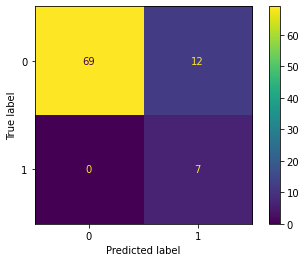

In [340]:
plot_confusion_matrix(gnb,test_X,test_y)

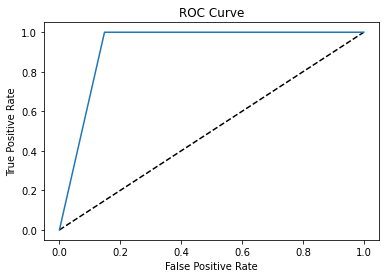

ROC Score: 0.9259259259259259


In [341]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
from sklearn.metrics import roc_auc_score
print("ROC Score:", roc_auc_score(test_y, y_pred))

## Decision Tree model

In [342]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)
y_pred_clf = clf.predict(test_X)
from sklearn.metrics import accuracy_score, confusion_matrix
print("The accuracy is:",accuracy_score(test_y,y_pred_clf)*100,"%")
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred_clf))

The accuracy is: 92.04545454545455 %
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        81
           1       0.50      0.43      0.46         7

    accuracy                           0.92        88
   macro avg       0.73      0.70      0.71        88
weighted avg       0.92      0.92      0.92        88



In [343]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10)
results_kfold = model_selection.cross_val_score(clf, train_X, train_y, cv=kfold)
print("10-fold cv",results_kfold*100)
print("--------------------------------------------------------------------")
print("10-fold accuracy mean:",results_kfold.mean()*100,"%") 

10-fold cv [ 94.44444444  83.33333333 100.         100.          94.44444444
  94.44444444 100.          88.23529412  94.11764706  94.11764706]
--------------------------------------------------------------------
10-fold accuracy mean: 94.31372549019608 %


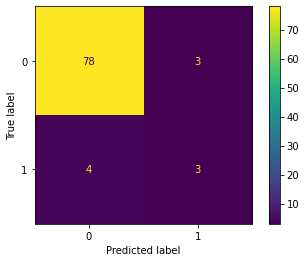

In [344]:
plot_confusion_matrix(clf,test_X,test_y)

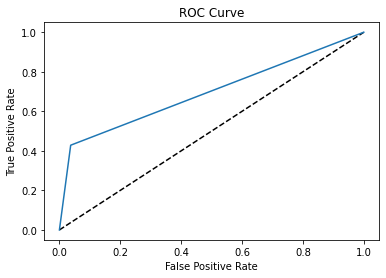

ROC Score: 0.6957671957671958


In [345]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
from sklearn.metrics import roc_auc_score
print("ROC Score:", roc_auc_score(test_y, y_pred_clf))

Therefore for classifying the games in Sports genre, the Naive Bayes is the better model since it gave a better AUC score of 0.95